In [1]:
# importing libraries and 

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
%load_ext autotime


time: 16 ms (started: 2021-06-11 00:03:08 +05:30)


In [2]:
target = []
images = []
flat_data = []

DATADIR = 'dataset\dogcat\data'
CATEGORIES = ['cat', 'dog']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)    # Label encoding the values
  path = os.path.join(DATADIR, category)    # getting path of images 
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)
  
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


  

time: 6.16 s (started: 2021-06-11 00:03:08 +05:30)


In [3]:
# split data into trainging and testing 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(flat_data, target, test_size=0.3, random_state=109)

time: 2.22 s (started: 2021-06-11 00:03:15 +05:30)


In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000], 'kernel':['linear']},
              {'C':[1,10,100,1000], 'gamma':[0.001,0.0001], 'kernel':['rbf']}
]

svc = svm.SVC(probability = True)
clf = GridSearchCV(svc, param_grid)
clf.fit(x_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

time: 1min 59s (started: 2021-06-11 00:03:17 +05:30)


In [5]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

time: 438 ms (started: 2021-06-11 00:05:16 +05:30)


In [6]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 0 ns (started: 2021-06-11 00:05:16 +05:30)


In [7]:
accuracy_score(y_pred,y_test)

0.4666666666666667

time: 16 ms (started: 2021-06-11 00:05:16 +05:30)


In [8]:
confusion_matrix(y_pred,y_test)

array([[13, 16],
       [ 0,  1]], dtype=int64)

time: 16 ms (started: 2021-06-11 00:05:16 +05:30)


In [9]:
#save model using Pickle library
import pickle
pickle.dump(clf,open('DC_model.p', 'wb'))

time: 125 ms (started: 2021-06-11 00:05:16 +05:30)


In [10]:
# loading the saved model using pickle

model = pickle.load(open('DC_model.p', 'rb'))

time: 46 ms (started: 2021-06-11 00:05:17 +05:30)


Enter your URLhttps://navbharattimes.indiatimes.com///astro/wp-content/uploads/2018/06/32592-0-these-sign-of-dogs-predicts-your-future.jpg
(490, 655, 3)
PREDICTED OUTPUT: cat


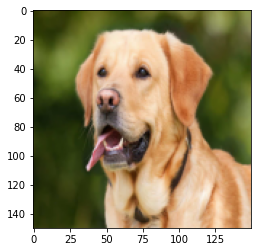

time: 1min 48s (started: 2021-06-11 00:05:17 +05:30)


In [11]:
# testing a brand new image
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img, (150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')

In [12]:
from pyngrok import ngrok

time: 203 ms (started: 2021-06-11 00:07:05 +05:30)


In [13]:
%%writefile app.py
import streamlit as st
import numpy as np 
from sklearn.io import imread
from sklearn.transform import resize
import pickle
from PIL import Image

st.set_option('deprecation.shoefileUploaderEncoding', False)
st.title("Dog Cat Classifier")
st.text('Upload the Image')

# Loading the model
model = pickle.load(open('DC_model.p', 'rb'))

# uploading an Image
uploaded_file = st.file_uploader("Choose an image...", type="jpg")
if uploaded_file is not None:
    img = Image.open(uploaded_file)
    st.image(img,cation="Uploaded Image")
    
    if st.button('PREDICT'):
        CATEGORIES = ['cat', 'dog']
        st.write('Result: ')
        flat_data = []
        img = np.array(img)
        img_resized = resize(img, (150,150,3))
        flat_data.append(img_resized.flatten())
        flat_data = np.array(flat_data)
        st.write(img.shape)
        y_out = model.predict(flat_data)
        y_out = CATEGORIES[y_out[0]]
        st.title(f'PREDICTED OUTPUT: {y_out}')
        q = model.predict_proba(flat_data)
        for index, item in enumerate(CATEGORIES):
            st.write(f'{item} : {q[0][index]*100}%')
    

Overwriting app.py
time: 0 ns (started: 2021-06-11 00:07:05 +05:30)


In [14]:
!nohup streamlit run app.py &

url = ngrok.connect(port='8501')
url


OSError: Background processes not supported.

time: 1.45 s (started: 2021-06-11 00:07:06 +05:30)
